**Title:** 

Severity of Accidents Based on Weather Conditions



Cheuk On Yim, Matthew Stoney, Paola Torres, Wicaksa Munajat


In [ ]:
!pip install --upgrade xlrd

# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


**Intro:**

Initially, we began exploring the data set from the California Highway Patrol Statewide Integrated Traffic Record System (https://www.chp.ca.gov/programs-services/services-information/switrs-internet-statewide-integrated-traffic-records-system/switrs-2017-report). Our goal was to build a model that would predict the probability of an accident based on certain variables. However, we were unable to determine interesting variables for us to complete. Therefore, we decided to consider another data set option.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 47 to 53
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            7 non-null      object 
 1   tot_fatal_m    7 non-null      float64
 2   tot_fatal_f    7 non-null      float64
 3   tot_inj_m      7 non-null      float64
 4   tot_inj_f      7 non-null      float64
 5   tot_drivers    7 non-null      float64
 6   fault_fatal_m  7 non-null      float64
 7   fault_fatal_f  7 non-null      float64
 8   fault_inj_m    7 non-null      float64
 9   fault_inj_f    7 non-null      float64
 10  fault_total    7 non-null      float64
dtypes: float64(10), object(1)
memory usage: 672.0+ bytes


,tot_fatal_m,tot_fatal_f,tot_inj_m,tot_inj_f,tot_drivers,fault_fatal_m,fault_fatal_f,fault_inj_m,fault_inj_f,fault_total
count,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,90.285714,35.000000,4244.00000,2800.142857,7169.428571,41.857143,17.428571,1933.571429,1280.571429,3273.428571
std,83.105785,26.236107,3937.45146,2501.746085,6546.885745,32.616093,8.403514,1564.159397,918.989818,2517.158971
min,13.000000,8.000000,382.00000,295.000000,698.000000,9.000000,6.000000,285.000000,211.000000,511.000000
25%,32.500000,16.000000,1322.00000,918.500000,2289.000000,22.500000,11.000000,797.500000,587.000000,1418.000000
50%,55.000000,26.000000,3025.00000,2015.000000,5121.000000,24.000000,18.000000,1513.000000,1095.000000,2650.000000
75%,127.500000,49.000000,6247.50000,4200.500000,10624.500000,55.500000,24.500000,2752.000000,1897.500000,4729.500000
max,244.000000,81.000000,11162.00000,7053.000000,18540.000000,104.000000,27.000000,4638.000000,2689.000000,7458.000000


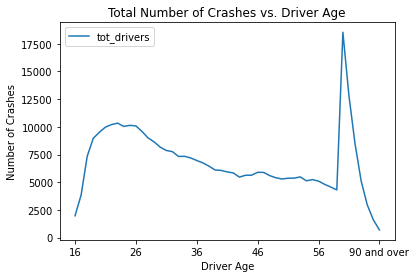

<Figure size 1080x720 with 0 Axes>

In [ ]:

prev_df = pd.read_excel("https://www.chp.ca.gov/InformationManagementDivisionSite/Documents/8-Section%20Three%202017%20(Revised%20on%2001312020).xls", sheet_name=2, skiprows=4)
prev_df = prev_df.drop('Unnamed: 1', axis=1)
prev_df = prev_df.drop(index=[0, 1, 2, 54, 55])
prev_df.columns = ["age", "tot_fatal_m", "tot_fatal_f", "tot_inj_m", "tot_inj_f", "tot_drivers", "fault_fatal_m", "fault_fatal_f", "fault_inj_m", "fault_inj_f", "fault_total"]


prev_df.plot.line(x='age', y='tot_drivers')
plt.title("Total Number of Crashes vs. Driver Age")
plt.xlabel("Driver Age")
plt.ylabel("Number of Crashes")
plt.figure(figsize=(15,10))

prev_df2 = prev_df.iloc[44:]
prev_df2.info()
prev_df2.describe()

**Dataset:** 
The new dataset we decided on includes data on 49 of the 50 states. The data spans from February 2016 to present day. It reflects traffic information collected by various entities such as law enforcement, traffic cameras, the US and state departments of transportation, and traffic sensors. The dataset consists of about 1.5 million accident records.

**Data Cleaning/Processing:** 
The dataset was too large to use as is since it spans almost the entire United States. Due to this, we made the dataset smaller by creating a dataframe that contains traffic information only from Santa Clara County. 
Along with this, we also dropped columns that were irrelevant to our data processing question.

**Goal:**
We will use this modified dataset (see above) based on the dataset from https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents to predict the severity of an accident based on weather conditions. We will use the severity, precipitation, and visibility features as predictors.  

**Initial Data and Preprocessing**

Read Data Frame and show the top rows of the data.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mjstoney/CST383_project/main/santa_clara_co_traffic_data.csv')
df.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,...,False,False,False,False,False,False,Day,Day,Day,Day
1,995,A-996,2,2016-03-23 05:55:55,2016-03-23 11:55:55,37.425920,-122.098790,37.430420,-122.103520,0.405,...,False,False,False,False,False,False,Night,Night,Night,Day
2,997,A-998,2,2016-03-23 06:45:09,2016-03-23 12:45:09,37.316480,-121.967460,37.318100,-121.978100,0.595,...,False,False,False,False,False,False,Night,Day,Day,Day
3,1002,A-1003,2,2016-03-23 08:52:43,2016-03-23 14:52:43,37.377536,-121.945376,37.377375,-121.944519,0.048,...,False,False,False,False,False,False,Day,Day,Day,Day
4,1025,A-1026,2,2016-03-23 16:21:05,2016-03-23 22:21:05,37.364700,-121.843900,37.370720,-121.848700,0.492,...,False,False,False,False,False,False,Day,Day,Day,Day


Checking out some statistics on the data. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27415 entries, 0 to 27414
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             27415 non-null  int64  
 1   ID                     27415 non-null  object 
 2   Severity               27415 non-null  int64  
 3   Start_Time             27415 non-null  object 
 4   End_Time               27415 non-null  object 
 5   Start_Lat              27415 non-null  float64
 6   Start_Lng              27415 non-null  float64
 7   End_Lat                27415 non-null  float64
 8   End_Lng                27415 non-null  float64
 9   Distance(mi)           27415 non-null  float64
 10  Description            27415 non-null  object 
 11  Number                 4949 non-null   float64
 12  Street                 27415 non-null  object 
 13  Side                   27415 non-null  object 
 14  City                   27415 non-null  object 
 15  Co

Let's see if there are missing values in this data set. After plotting, it looks like Number, Precipitation, and Wind Chill values have the most null values.

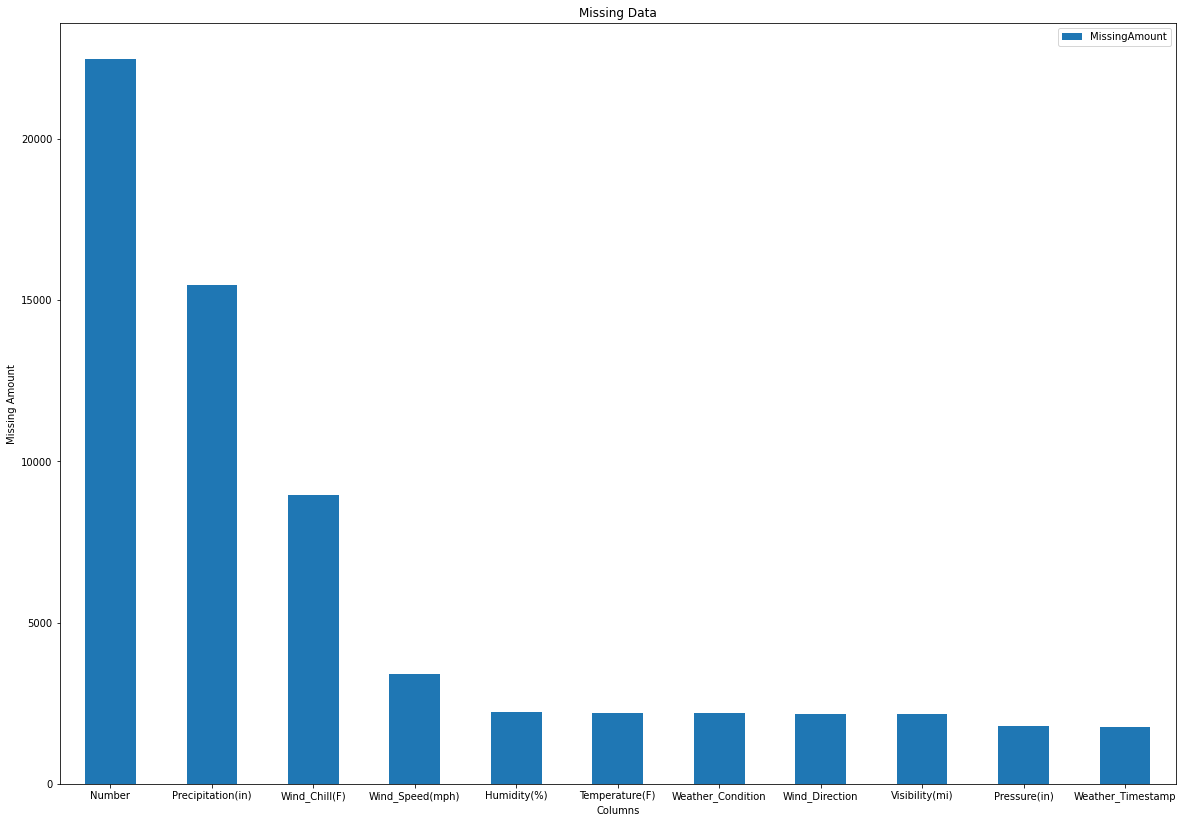

In [ ]:
# Color Palate
# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Find the columns with the most missing values
missing = df.isnull().sum(axis=0).reset_index()
missing.columns = ['ColumnName', 'MissingAmount']
missing = missing[missing['MissingAmount'] > 0]
missing = missing.sort_values(by='MissingAmount', ascending=False)

# Graph the missing values 
missing.set_index('ColumnName').plot.bar(rot=0, color=colors, title='Missing Data', xlabel='Columns',ylabel='Missing Amount', figsize=(20,14))


We can also look at the percentage of missing values in order to see which elements we need to deal with when we pre process the data. From the graph below, it looks like more than 80% of our data is missing from the Number column and more than 50% missing from the Precipitation Column.

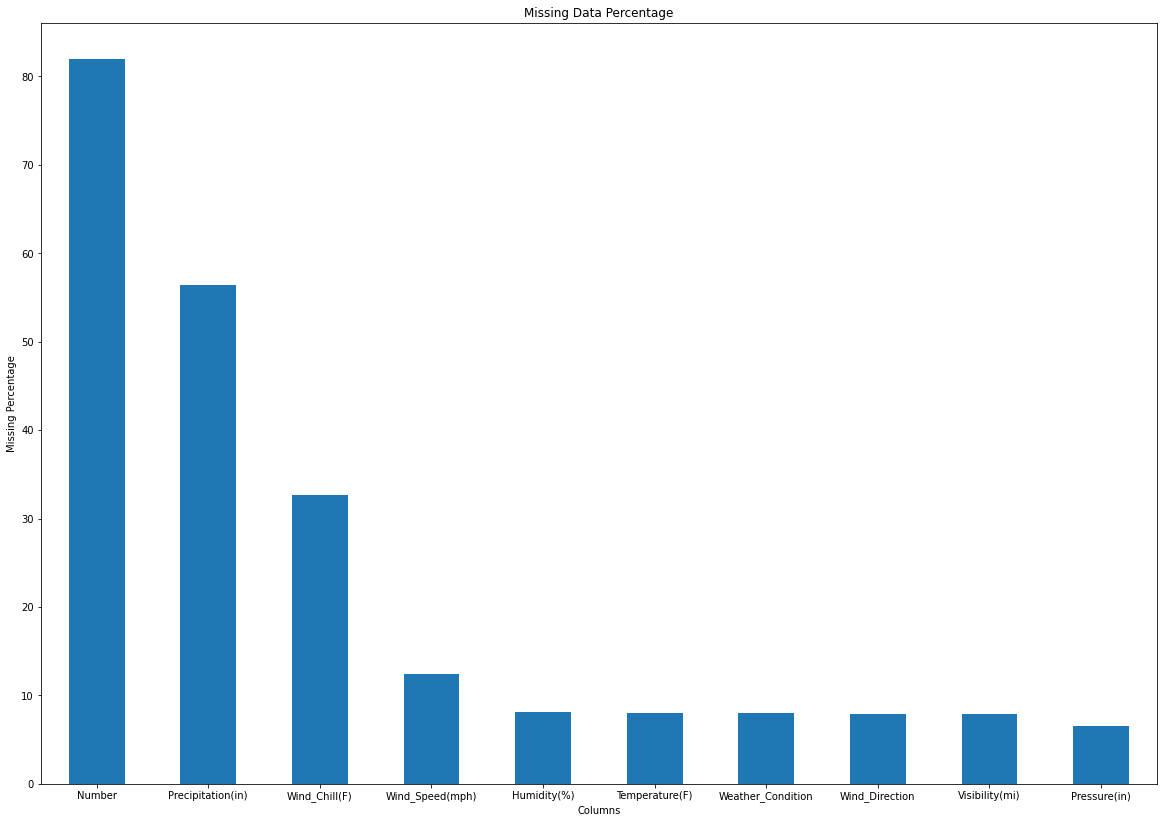

In [ ]:
perc_missing = df.isna().sum()/len(df)*100
perc_missing = perc_missing.sort_values(ascending=False)
perc_missing = perc_missing[:10]

perc_missing.plot.bar(rot=0, title='Missing Data Percentage', xlabel='Columns',ylabel='Missing Percentage', figsize=(20,14))


Instead of filling these, we will just drop the values. (We dropped the NA values for the precipitation column later before we tested and trained the model for machine learning).

In [ ]:
# Drop Number Column and windchill column
df.drop(["Number"], axis=1, inplace=True)
df.drop(["Wind_Chill(F)"], axis=1, inplace=True)

There are also other columns that we do not need such as Country or airport code so we will remove these as well. 

In [ ]:
df.drop(["Airport_Code"], axis=1, inplace=True)        # Not needed
df.drop(["Zipcode"], axis=1, inplace=True)             # Not Needed since we are grouping by County
df.drop(["Country"], axis=1, inplace=True)             # All in USA
df.drop(["Timezone"], axis=1, inplace=True)            # Same time zone
df.drop(["Roundabout"],axis=1,inplace=True)            # Not needed in our prediciton
df.drop(["Stop"],axis=1,inplace=True)                  # Not needed in our prediciton
df.drop(["Traffic_Calming"],axis=1,inplace=True)       # Not needed in our prediciton
df.drop(["Turning_Loop"],axis=1,inplace=True)          # Not needed in our prediciton
df.drop(["Astronomical_Twilight"],axis=1,inplace=True) # Not needed in our prediciton
df.drop(["Nautical_Twilight"],axis=1,inplace=True) 
df.drop(["Civil_Twilight"],axis=1,inplace=True) 
df.drop(["Sunrise_Sunset"],axis=1,inplace=True) 


Check the current columns and how the data looks now to make sure we have dropped correctly.

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'Side', 'City', 'County', 'State', 'Weather_Timestamp',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Station', 'Traffic_Signal'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Traffic_Signal
0,989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,...,Scattered Clouds,False,False,False,False,False,False,False,False,False
1,995,A-996,2,2016-03-23 05:55:55,2016-03-23 11:55:55,37.425920,-122.098790,37.430420,-122.103520,0.405,...,Scattered Clouds,False,False,False,False,False,False,False,False,False
2,997,A-998,2,2016-03-23 06:45:09,2016-03-23 12:45:09,37.316480,-121.967460,37.318100,-121.978100,0.595,...,Scattered Clouds,False,False,False,False,False,False,False,False,False
3,1002,A-1003,2,2016-03-23 08:52:43,2016-03-23 14:52:43,37.377536,-121.945376,37.377375,-121.944519,0.048,...,Mostly Cloudy,False,False,False,False,False,False,False,False,False
4,1025,A-1026,2,2016-03-23 16:21:05,2016-03-23 22:21:05,37.364700,-121.843900,37.370720,-121.848700,0.492,...,Clear,False,False,False,False,False,False,False,False,False


We can apply the median values for certain missing data like Temperature and visibility. 

In [ ]:
# Get median temp for temp column and fill
med_temp = df['Temperature(F)'].median()
df['Temperature(F)'].fillna(med_temp)

# Get median temp for visibility column and fill
med_visibility = df['Visibility(mi)'].median()
df['Visibility(mi)'].fillna(med_visibility)

# Get median for humidity% column and fill
med_humidity = df['Humidity(%)'].median()
df['Humidity(%)'].fillna(med_humidity)

0        63.0
1        82.0
2        86.0
3        80.0
4        46.0
         ... 
27410    43.0
27411    48.0
27412    45.0
27413    52.0
27414    52.0
Name: Humidity(%), Length: 27415, dtype: float64

**Data Analysis**

Which city in Santa Clara county has the most accidents? We plot a bar graph to see the number of accidents in each city and it looks like San Jose leads that category.

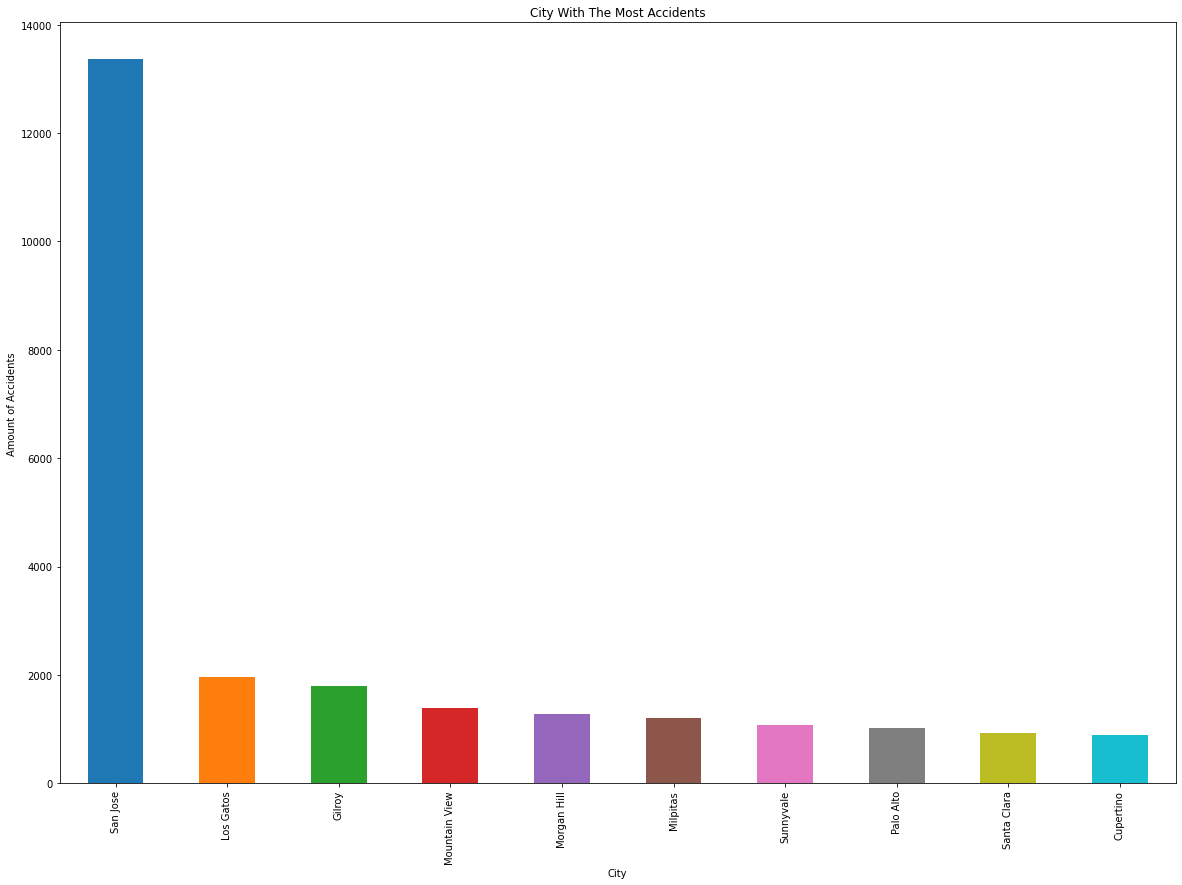

In [ ]:
# Create a mask
mask = ['City']
acc = df[mask]
acc = acc.City.value_counts()
acc = acc[:10]

# Plot
acc.plot.bar(title='City With The Most Accidents', xlabel='City', ylabel='Amount of Accidents', figsize=(20,14), color=colors)

We can visualize the data better at looking at a map of where most of these accidents occur. 

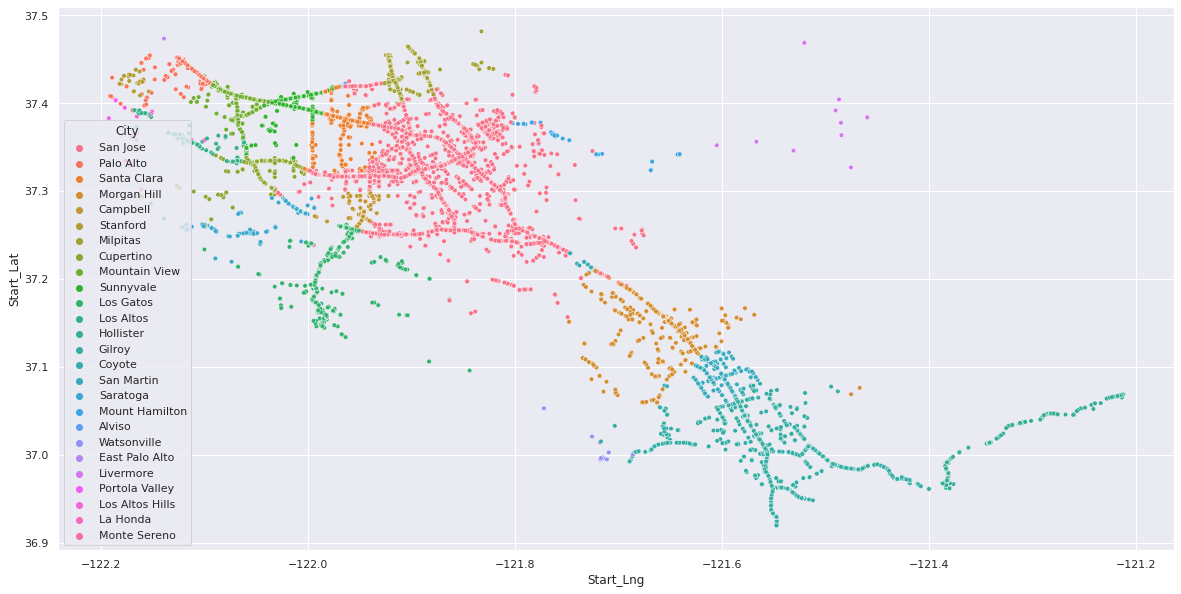

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=df, hue='City', legend=True, s=20)

Let us which weather condition has had the most accidents. From the data, it seems like Fair weather, Mostly cloudy and partly cloudly are the culprit. You would think that rain or haze would play a bigger part but it doesn't seem like it does in this case. 

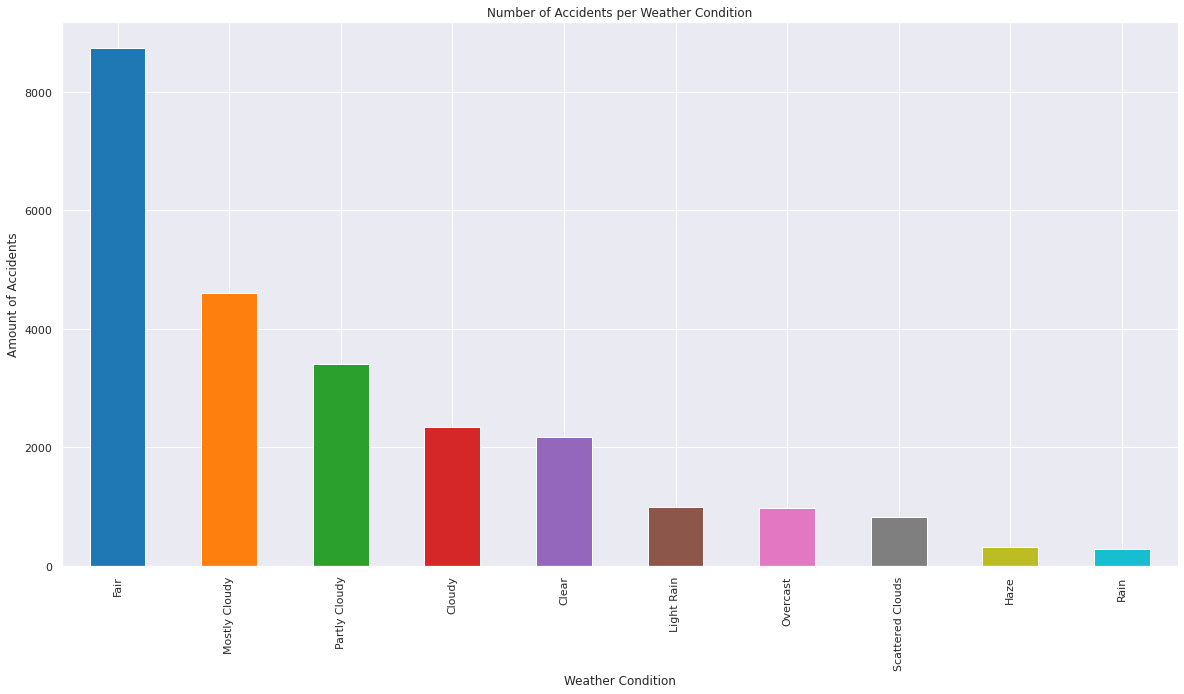

In [ ]:
x = df['Weather_Condition']
x = x.value_counts()
x = x[:10]
x.plot.bar(title='Number of Accidents per Weather Condition', xlabel='Weather Condition', ylabel='Amount of Accidents', figsize=(20,10), color=colors)

Since we want to look at to see if weather contributes to accident severity, let's take a closer look at some more weather data. We'll first take a look at accidents reported for different temperature ranges. This graph shows that most of the accidents that occured happened at a temperature somewhere between 55F-60F but the range of temperatures is around 35F-90F.



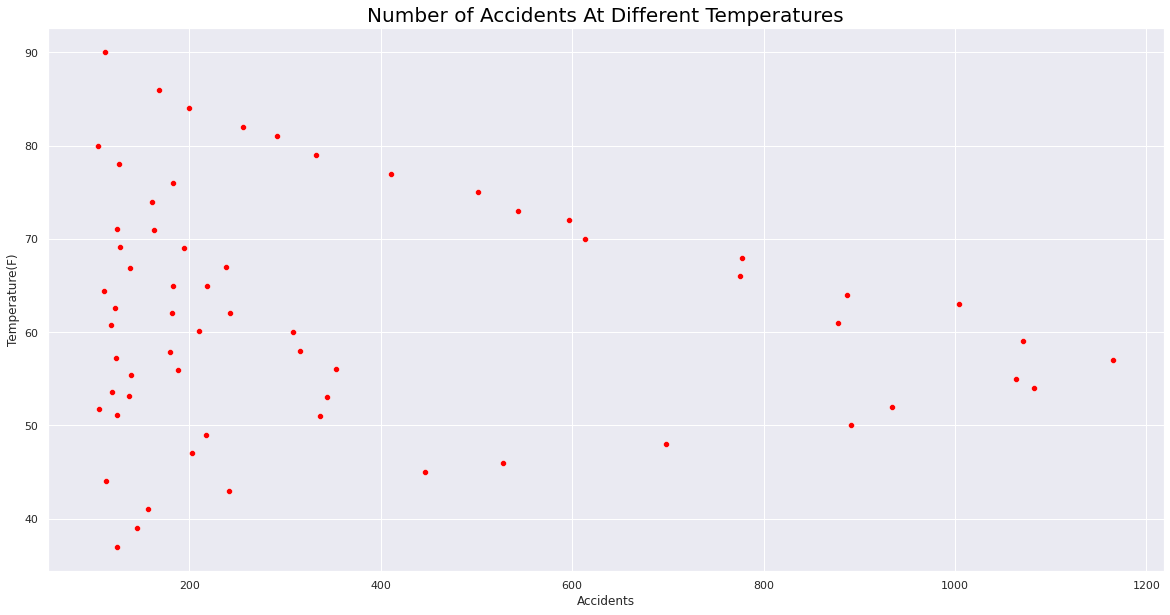

In [ ]:
# Create a new df
temp = df["Temperature(F)"].value_counts().reset_index().rename(columns={"index":"Temp","Temperature(F)":"Cases"})

# Plot
plt.figure(figsize=(20,10))
plt.title('Number of Accidents At Different Temperatures', size=20, color='black')
plt.xlabel('Accidents')
plt.ylabel('Temperature(F)')
g = sns.scatterplot(x=temp.Cases[temp.Cases>100],y=temp.Temp,color="red")

# Show
plt.show()


Let's see how humidity effects the number of accidents that occur. After plotting the data, we can see that there might be a positive correlation between the number of accidents increasing as the percent humidity increases.

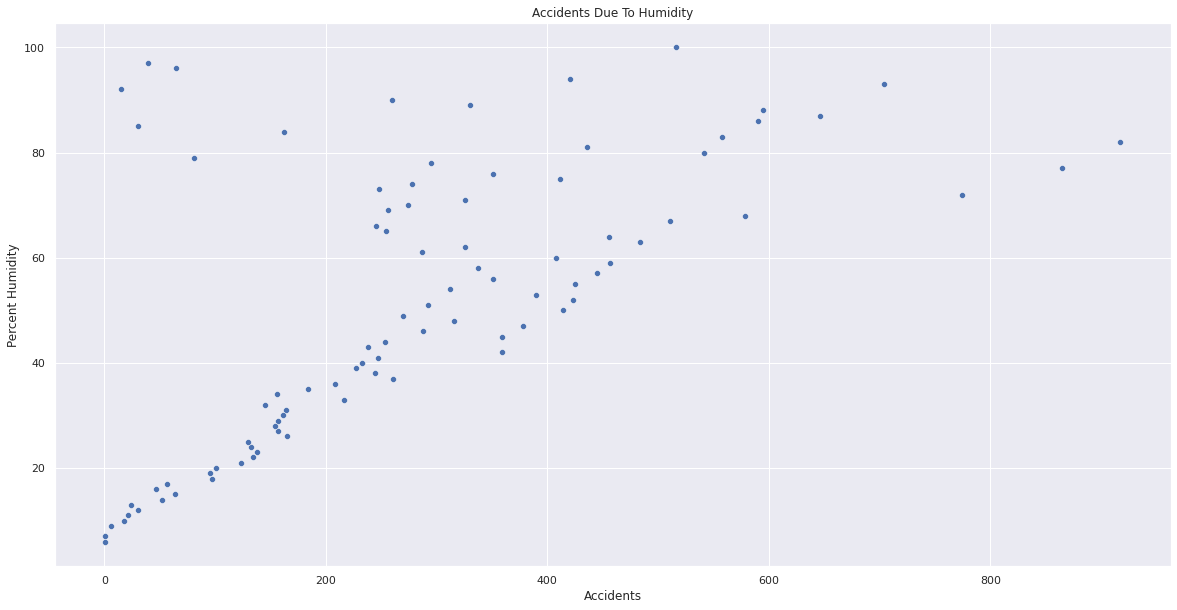

In [ ]:
# Create new pd
hdf = df["Humidity(%)"].value_counts().reset_index().rename(columns={"index":"Humidity","Humidity(%)":"Cases"})

# Plot
plt.figure(figsize=(20,10))
plt.title('Accidents Due To Humidity')
plt.xlabel('Accidents')
plt.ylabel('Percent Humidity')

h = sns.scatterplot(x=hdf.Cases, y=hdf.Humidity, color='b')
plt.show()

**Machine Learning**
We will now see if weather conditions play a role in predicting traffic accidents. We will first drop any values that are null. We can now use these variables for machine learning.

In [ ]:
df_ser_prec = df[["Severity","Precipitation(in)","Visibility(mi)"]].dropna()
df_ser_prec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11586 entries, 31 to 27414
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           11586 non-null  int64  
 1   Precipitation(in)  11586 non-null  float64
 2   Visibility(mi)     11586 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 362.1 KB


In [ ]:
df_14 = df_ser_prec[ (df_ser_prec["Severity"]==1) | (df_ser_prec["Severity"]==4) ]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df_ser_prec[['Precipitation(in)', 'Visibility(mi)']], df_ser_prec['Severity'], train_size=0.75)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
p = knn.predict(X_test)

result = confusion_matrix(y_test, p)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, p)
print("Classification Report:",)
print (result1)
result2 = (y_test == p).mean()
print("Accuracy: ", result2)

Confusion Matrix:
[[   1   93    0    0]
 [   1 2704    0    0]
 [   0   59    0    0]
 [   0   39    0    0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.01      0.02        94
           2       0.93      1.00      0.97      2705
           3       0.00      0.00      0.00        59
           4       0.00      0.00      0.00        39

    accuracy                           0.93      2897
   macro avg       0.36      0.25      0.25      2897
weighted avg       0.89      0.93      0.90      2897

Accuracy:  0.9337245426303072


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's look at the number of Severity in our data set based on how severe each accident was on a scale of 1-4. 

In [ ]:
df_ser_prec.Severity.value_counts()

2    10889
1      365
3      201
4      131
Name: Severity, dtype: int64

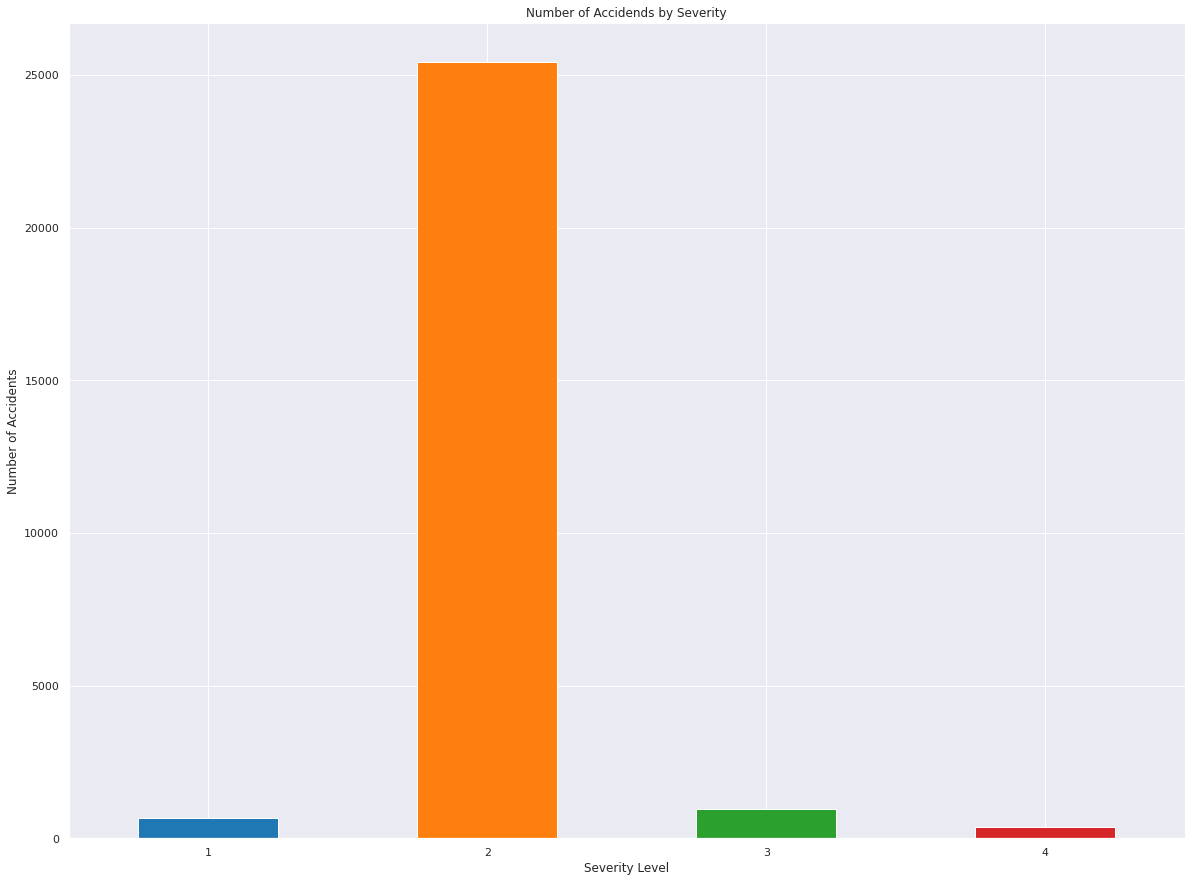

In [ ]:
sev = df['Severity'].value_counts().sort_index()
sev.plot.bar(title = 'Number of Accidents by Severity', xlabel = 'Severity Level', ylabel = 'Number of Accidents', rot = 0, figsize = (20, 15), color=colors)

Since most of the accident's severity is on level 2, the accuracy of the K Neighbor Classifier for all four level is not convincing. Let's train the model on only level 1, 3 and 4.

In [ ]:
df_ser_prec = df[["Severity","Precipitation(in)","Visibility(mi)"]].dropna()
df_ser_prec.info()
df_14 = df_ser_prec[ (df_ser_prec["Severity"]==1) | (df_ser_prec["Severity"]==3) | (df_ser_prec["Severity"]==4) ]


X = df_14[["Precipitation(in)", "Visibility(mi)"]].values
y = (df_14['Severity']==1).values.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

'predictions' and 'y_test'

accuracy = (predictions == y_test).mean()
print('accuracy: {0:.3f}'. format(accuracy))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11586 entries, 31 to 27414
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           11586 non-null  int64  
 1   Precipitation(in)  11586 non-null  float64
 2   Visibility(mi)     11586 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 362.1 KB
accuracy: 0.543


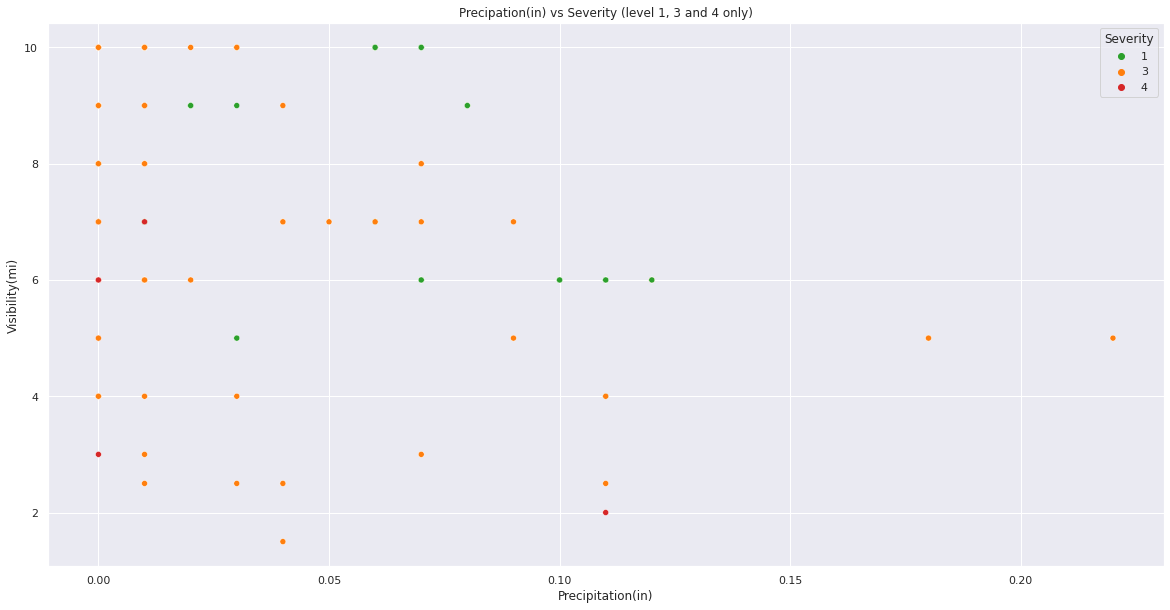

In [ ]:
palette = {1:"tab:green",
           3:"tab:orange",
           4:"tab:red"}

sns.scatterplot(data=df_14 , x="Precipitation(in)", y="Visibility(mi)", hue="Severity", palette=palette).set(title='Precipation(in) vs Severity (level 1, 3 and 4 only)')
sns.set(rc = {'figure.figsize':(6,4)})


The accuracy is very low for level 1, 3 and 4. When the data set is put on a scatter plot, it is not hard to see that why the accuracy is low. The level of severity is scattered somewhat evenly on different values of precipitation and visibility.

Evaluate prediction error on training and test data. 

In [ ]:
# Training Data
print("Training data prediction error: ")

# MSE
pred = knn.predict(X_train)
mse = mean_squared_error(y_train, pred)
print('MSE of Training Data: {0:.2f}'.format(mse))

# RMSE
rmse = np.sqrt(mse)
print('RMSE of Training Data: {0:.2f}'.format(rmse))


# Testing Data
print()
print("Testing data prediction error: ")

# MSE
pred2 = knn.predict(X_test)
mse2 = mean_squared_error(y_test, pred2)
print('MSE of Testing Data: {0:.2f}'.format(mse2))

# RMSE
rmse2 = np.sqrt(mse2)
print('RMSE of Testing Data: {0:.2f}'.format(rmse2))

Training data prediction error: 
MSE of Training Data: 2.43
RMSE of Training Data: 1.56

Testing data prediction error: 
MSE of Testing Data: 2.40
RMSE of Testing Data: 1.55
